### Task

This week’s assignment involves running a k-means cluster analysis. Cluster analysis is an unsupervised machine learning method that partitions the observations in a data set into a smaller set of clusters where each observation belongs to only one cluster. The goal of cluster analysis is to group, or cluster, observations into subsets based on their similarity of responses on multiple variables. Clustering variables should be primarily quantitative variables, but binary variables may also be included.

Your assignment is to run a k-means cluster analysis to identify subgroups of observations in your data set that have similar patterns of response on a set of clustering variables.

### Data
This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

#### Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
    * Iris Setosa 
    * Iris Versicolour 
    * Iris Virginica


### Results
A k-means cluster analysis was conducted to identify classes of iris plants based on their similarity of responses on 4 variables that represent characteristics of the each plant bud.  Clustering variables included 4 quantitative variables such as: sepal length, sepal width, petal length, and petal width.

Data were randomly split into a training set that included 70% of the observations and a test set that included 30% of the observations. Then k-means cluster analyses was conducted on the training data specifying k=3 clusters (representing three classes: Iris Setosa, Iris Versicolour, Iris Virginica), using Euclidean distance.

To describe the performance of a classifier and see what types of errors our classifier is making a confusion matrix was created. The accuracy score is 0.82, which is quite good due to the small number of observation (n=150).

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import  datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

rnd_state = 3927

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


In [3]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
pca_transformed = PCA(n_components=2).fit_transform(data.iloc[:, :4])

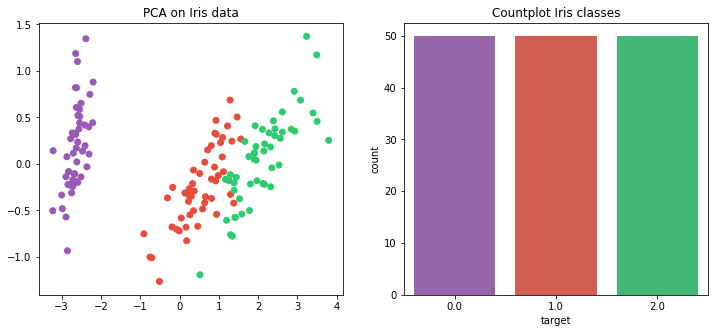

In [7]:
colors=["#9b59b6", "#e74c3c", "#2ecc71"]
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(list(map(lambda tup: tup[0], pca_transformed)),
            list(map(lambda tup: tup[1], pca_transformed)), 
            c=list(map(lambda col: "#9b59b6" if col==0 else "#e74c3c" if col==1 else "#2ecc71", data.target)))
plt.title('PCA on Iris data')

plt.subplot(122)
sns.countplot(data.target, palette=sns.color_palette(colors))
plt.title('Countplot Iris classes');

For visualization purposes, the number of dimensions was reduced to two by applying PCA analysis. The plot illustrates that classes 1 and 2 are not clearly divided. Countplot illustrates that our classes contain the same number of observations (n=50), so they are balanced.

In [85]:
(predictors_train, predictors_test,
 target_train, target_test) = train_test_split(data.iloc[:, :4], data.target, test_size = .3, random_state = rnd_state)

In [86]:
classifier = KMeans(n_clusters=3).fit(predictors_train)
prediction = classifier.predict(predictors_test)

In [87]:
pca_transformed = PCA(n_components=2).fit_transform(predictors_test)

Predicted classes 1 and 2 mismatch the real ones, so the code block below fixes that problem.

In [88]:
prediction = np.where(prediction==1, 3, prediction)
prediction = np.where(prediction==2, 1, prediction)
prediction = np.where(prediction==3, 2, prediction)

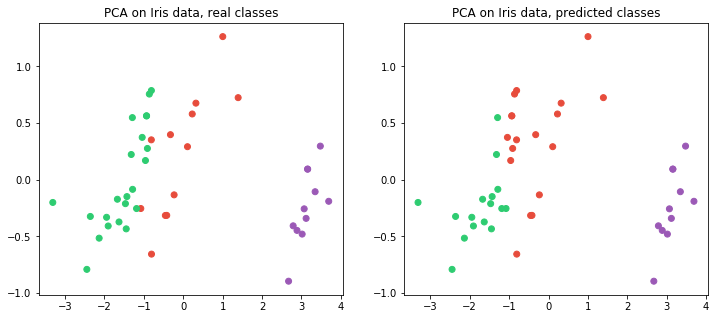

In [91]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(list(map(lambda tup: tup[0], pca_transformed)),
            list(map(lambda tup: tup[1], pca_transformed)), 
            c=list(map(lambda col: "#9b59b6" if col==0 else "#e74c3c" if col==1 else "#2ecc71", target_test)))
plt.title('PCA on Iris data, real classes');

plt.subplot(122)
plt.scatter(list(map(lambda tup: tup[0], pca_transformed)),
            list(map(lambda tup: tup[1], pca_transformed)), 
            c=list(map(lambda col: "#9b59b6" if col==0 else "#e74c3c" if col==1 else "#2ecc71", prediction)))
plt.title('PCA on Iris data, predicted classes');

The figure shows that our simple classifier did a good job in identifing the classes, despite the few mistakes.

In [78]:
clust_df = predictors_train.reset_index(level=[0])
clust_df.drop('index', axis=1, inplace=True)
clust_df['cluster'] = classifier.labels_

In [79]:
clust_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.7,2.8,4.5,1.3,0
1,5.6,2.7,4.2,1.3,0
2,7.1,3.0,5.9,2.1,2
3,6.5,3.0,5.8,2.2,2
4,5.9,3.0,4.2,1.5,0


In [80]:
print ('Clustering variable means by cluster')
clust_df.groupby('cluster').mean()

Clustering variable means by cluster


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.859091,2.790909,4.343182,1.415909
1,4.989744,3.425641,1.471795,0.248718
2,6.886364,3.090909,5.854545,2.077273


In [92]:
print('Confusion matrix:\n', pd.crosstab(target_test, prediction, colnames=['Actual'], rownames=['Predicted'], margins=True))
print('\nAccuracy: ', accuracy_score(target_test, prediction))

Confusion matrix:
 Actual      0   1   2  All
Predicted                 
0.0        11   0   0   11
1.0         0  11   1   12
2.0         0   7  15   22
All        11  18  16   45

Accuracy:  0.8222222222222222
